<a href="https://colab.research.google.com/github/salmanhiro/MALT90-Clumps-Classification-Deep-Learning/blob/main/MALT90_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/malt90

/content/drive/MyDrive/malt90


In [ ]:
!wget https://data-portal.hpc.swin.edu.au/dataset/86ebad44-1f4a-40d4-a65a-0e29148dc328/resource/882697e7-c6d4-46da-8000-74007a7df00f/download/malt90imagearchive.tar
!wget https://data-portal.hpc.swin.edu.au/dataset/86ebad44-1f4a-40d4-a65a-0e29148dc328/resource/f97a614b-7163-4b0a-93cc-c827b5128f50/download/malt90lineinfo.csv

--2021-11-28 13:04:20--  https://data-portal.hpc.swin.edu.au/dataset/86ebad44-1f4a-40d4-a65a-0e29148dc328/resource/882697e7-c6d4-46da-8000-74007a7df00f/download/malt90imagearchive.tar
Resolving data-portal.hpc.swin.edu.au (data-portal.hpc.swin.edu.au)... 136.186.1.175
Connecting to data-portal.hpc.swin.edu.au (data-portal.hpc.swin.edu.au)|136.186.1.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3663155200 (3.4G) [application/x-tar]
Saving to: ‘malt90imagearchive.tar.1’

malt90imagearchive.   9%[>                   ] 315.79M  13.2MB/s    eta 4m 50s ^C
--2021-11-28 13:04:50--  https://data-portal.hpc.swin.edu.au/dataset/86ebad44-1f4a-40d4-a65a-0e29148dc328/resource/f97a614b-7163-4b0a-93cc-c827b5128f50/download/malt90lineinfo.csv
Resolving data-portal.hpc.swin.edu.au (data-portal.hpc.swin.edu.au)... 136.186.1.175
Connecting to data-portal.hpc.swin.edu.au (data-portal.hpc.swin.edu.au)|136.186.1.175|:443... connected.
HTTP request sent, awaiting response... 20

In [ ]:
!ls

 Aim_ml_split		    malt90fit_Aim_classes    malt90imagearchive.tar.1
 checkpoint		    malt90fit_classes	     malt90image_fitresults
 ckpt.data-00000-of-00001   malt90image		     malt90lineinfo.csv
 ckpt.index		    malt90image_Aim	     malt90lineinfo.csv.1
 MALT90_cleaning.ipynb	    malt90imagearchive.tar  'MALT90 Training'


In [ ]:
!mkdir malt90image

In [ ]:
!tar -C malt90image -xvf malt90imagearchive.tar

In [ ]:
!mkdir malt90image_Gim

In [ ]:
%cd malt90image
!find . -name '*_Gim.png' -exec mv {} ../malt90image_Gim \;
%cd ..

/content/drive/My Drive/malt90/malt90image
/content/drive/My Drive/malt90


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
datasets_meta = pd.read_csv("/content/drive/MyDrive/malt90/malt90lineinfo.csv")

In [ ]:
datasets_meta.head(10)

,ag_id,ag_name,ag_long,ag_lat,ag_flux_peak,classification,Vc,nNL,tau,dtau,hcop_D,hcop_NG,hcop_Tastar,hcop_dTastar,hcop_Vlsr,hcop_dVlsr,hcop_fwhm,hcop_dfwhm,hcop_ii,hcop_dii,hcop_signoise,hcop_Pfit,hcop_iisnr,hcop_Rf,hcop_HR,hcop_Rs,hnc_D,hnc_NG,hnc_Tastar,hnc_dTastar,hnc_Vlsr,hnc_dVlsr,hnc_fwhm,hnc_dfwhm,hnc_ii,hnc_dii,hnc_signoise,hnc_Pfit,hnc_iisnr,hnc_Rf,...,c2h_ii,c2h_dii,c2h_signoise,c2h_Pfit,c2h_iisnr,c2h_Rf,c2h_HR,c2h_Rs,sio_D,sio_NG,sio_Tastar,sio_dTastar,sio_Vlsr,sio_dVlsr,sio_fwhm,sio_dfwhm,sio_ii,sio_dii,sio_signoise,sio_Pfit,sio_iisnr,sio_Rf,sio_HR,sio_Rs,h41a_D,h41a_NG,h41a_Tastar,h41a_dTastar,h41a_Vlsr,h41a_dVlsr,h41a_fwhm,h41a_dfwhm,h41a_ii,h41a_dii,h41a_signoise,h41a_Pfit,h41a_iisnr,h41a_Rf,h41a_HR,h41a_Rs
0,AG0001,AGAL000.002+00.174_A,0.002,0.174,0.46,P,111.17,6.0,0.82,1.34,Y,1.0,0.294,0.010,104.455,0.779,31.422,2.134,11.020,0.316,0.124,0.000,34.856,1.952,1.0,120.0,Y,1.0,0.374,0.020,110.867,0.342,12.386,0.818,5.057,0.271,0.154,1.000,18.645,0.875,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,18.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,40.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
1,AG0002,AGAL000.002+00.174_B,0.002,0.174,0.46,P,-7.16,2.0,0.00,0.00,Y,1.0,0.427,0.037,-7.158,0.108,2.545,0.254,1.158,0.154,0.124,0.241,7.493,1.475,1.0,120.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,18.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,40.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
2,AG0003,AGAL000.006+00.157_A,0.006,0.157,1.76,U,-6.51,6.0,0.08,0.31,Y,1.0,2.411,0.039,-6.578,0.017,2.136,0.040,5.388,0.139,0.119,0.275,38.801,1.394,0.0,58.0,Y,1.0,1.461,0.046,-6.519,0.031,1.974,0.072,3.172,0.167,0.137,0.000,18.989,1.119,...,1.977,0.174,0.120,0.188,11.379,1.234,0.0,84.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,46.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
3,AG0004,AGAL000.006+00.157_B,0.006,0.157,1.76,U,107.19,6.0,0.00,0.00,Y,1.0,0.362,0.009,106.479,0.473,33.233,1.199,13.832,0.323,0.118,0.001,42.766,1.566,0.0,58.0,Y,1.0,0.347,0.015,107.978,0.398,17.168,0.973,6.673,0.276,0.137,0.999,24.189,1.156,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,84.0,Y,1.0,0.133,0.027,108.512,0.475,4.415,1.120,0.626,0.151,0.121,0.459,4.141,1.007,0.0,46.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0
4,AG0005,AGAL000.013-00.019_A,0.013,-0.019,5.11,Q,-18.23,4.0,0.00,0.00,Y,1.0,0.705,0.023,-17.748,0.160,9.867,0.379,6.828,0.257,0.151,0.003,26.534,1.777,1.0,832.0,Y,1.0,0.367,0.016,-16.128,0.452,17.644,1.182,7.645,0.293,0.150,0.134,26.083,1.578,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,57.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,62.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
5,AG0006,AGAL000.013-00.019_B,0.013,-0.019,5.11,Q,80.00,4.0,0.00,0.00,Y,1.0,0.606,0.008,69.552,0.623,65.176,1.710,47.122,0.556,0.151,0.000,84.828,3.417,1.0,832.0,Y,1.0,0.329,0.008,87.579,1.038,63.779,2.835,24.940,0.545,0.150,0.603,45.773,1.332,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,57.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,62.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
6,AG0007,AGAL000.021-00.051_A,0.021,-0.051,3.72,U,45.05,6.0,5.99,3.88,Y,1.0,1.633,0.031,46.618,0.425,43.089,1.032,79.815,1.409,0.439,0.002,56.642,1.789,1.0,119.0,Y,1.0,1.230,0.040,42.943,0.406,25.152,0.968,36.006,1.132,0.428,0.119,31.804,1.440,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,26.0,Y,1.0,0.478,0.050,42.805,1.009,16.439,2.650,9.068,0.843,0.443,0.299,10.763,1.035,0.0,23.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
7,AG0008,AGAL000.021-00.051_B,0.021,-0.051,3.72,U,-14.92,5.0,0.00,0.00,Y,1.0,0.678,0.058,-16.419,0.548,12.170,1.352,9.371,0.731,0.439,0.953,12.812,1.183,1.0,119.

In [ ]:
datasets_meta["classification"].value_counts()

A    794
U    776
H    747
Q    688
P    362
C    189
Name: classification, dtype: int64

In [ ]:
list(set(datasets_meta["classification"]))

['H', 'C', 'P', 'U', 'A', 'Q']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls

 Aim_ml_split		    malt90fit_classes	       malt90image_Gim
 checkpoint		    malt90image		       malt90lineinfo.csv
 ckpt.data-00000-of-00001   malt90image_Aim	       malt90lineinfo.csv.1
 ckpt.index		    malt90imagearchive.tar    'MALT90 Training'
 MALT90_cleaning.ipynb	    malt90imagearchive.tar.1
 malt90fit_Aim_classes	    malt90image_fitresults


(-0.5, 829.5, 792.5, -0.5)

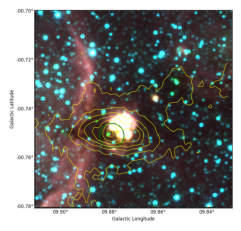

In [ ]:
example = plt.imread("malt90image_Gim/AG0605_Gim.png")
plt.imshow(example)
plt.axis(False)

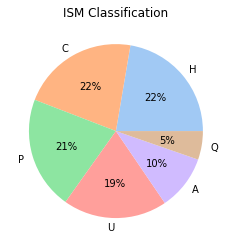

In [ ]:
colors = sns.color_palette('pastel')[0:6]

plt.pie(datasets_meta["classification"].value_counts(), labels =  list(set(datasets_meta["classification"])), colors = colors, autopct='%.0f%%')
plt.title("ISM Classification")
plt.show()

In [ ]:
class_a = datasets_meta.loc[datasets_meta["classification"] == "A"]
class_p = datasets_meta.loc[datasets_meta["classification"] == "P"]
class_q = datasets_meta.loc[datasets_meta["classification"] == "Q"]
class_h = datasets_meta.loc[datasets_meta["classification"] == "H"]
class_u = datasets_meta.loc[datasets_meta["classification"] == "U"]
class_c = datasets_meta.loc[datasets_meta["classification"] == "C"]

In [ ]:
plt.style.use('ggplot')

In [ ]:
class_a.head()

,ag_id,ag_name,ag_long,ag_lat,ag_flux_peak,classification,Vc,nNL,tau,dtau,hcop_D,hcop_NG,hcop_Tastar,hcop_dTastar,hcop_Vlsr,hcop_dVlsr,hcop_fwhm,hcop_dfwhm,hcop_ii,hcop_dii,hcop_signoise,hcop_Pfit,hcop_iisnr,hcop_Rf,hcop_HR,hcop_Rs,hnc_D,hnc_NG,hnc_Tastar,hnc_dTastar,hnc_Vlsr,hnc_dVlsr,hnc_fwhm,hnc_dfwhm,hnc_ii,hnc_dii,hnc_signoise,hnc_Pfit,hnc_iisnr,hnc_Rf,...,c2h_ii,c2h_dii,c2h_signoise,c2h_Pfit,c2h_iisnr,c2h_Rf,c2h_HR,c2h_Rs,sio_D,sio_NG,sio_Tastar,sio_dTastar,sio_Vlsr,sio_dVlsr,sio_fwhm,sio_dfwhm,sio_ii,sio_dii,sio_signoise,sio_Pfit,sio_iisnr,sio_Rf,sio_HR,sio_Rs,h41a_D,h41a_NG,h41a_Tastar,h41a_dTastar,h41a_Vlsr,h41a_dVlsr,h41a_fwhm,h41a_dfwhm,h41a_ii,h41a_dii,h41a_signoise,h41a_Pfit,h41a_iisnr,h41a_Rf,h41a_HR,h41a_Rs
21,AG0022,AGAL000.084-00.641_S,0.084,-0.641,1.19,A,16.89,5.0,0.00,0.00,Y,1.0,0.753,0.032,16.754,0.079,3.706,0.187,3.190,0.179,0.131,0.558,17.806,1.186,0.0,37.0,Y,1.0,0.851,0.036,17.135,0.064,3.108,0.151,2.949,0.169,0.134,0.331,17.488,1.154,...,1.188,0.277,0.138,0.890,4.287,1.135,0.0,52.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,44.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
23,AG0024,AGAL000.089-00.664_S,0.089,-0.664,4.42,A,17.49,9.0,0.51,0.11,Y,2.0,1.490,0.031,18.152,0.042,5.921,0.098,8.530,0.270,0.132,0.000,31.600,1.725,1.0,55.0,Y,2.0,1.292,0.030,18.556,0.047,7.411,0.110,7.888,0.288,0.128,0.000,27.390,1.623,...,1.676,0.230,0.133,0.083,7.283,1.413,0.0,83.0,Y,1.0,0.258,0.022,17.992,0.360,8.992,0.848,2.611,0.236,0.134,0.112,11.084,1.371,0.0,65.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
30,AG0031,AGAL000.113-00.679_S,0.113,-0.679,0.75,A,17.22,6.0,0.00,0.00,Y,1.0,0.881,0.036,17.110,0.061,3.050,0.143,3.013,0.157,0.132,0.048,19.191,1.074,0.0,56.0,Y,1.0,0.636,0.035,17.285,0.078,2.854,0.183,2.186,0.176,0.127,0.237,12.403,1.326,...,1.001,0.187,0.134,0.835,5.349,1.049,0.0,34.0,M,2.0,0.433,1.250,15.118,10.898,1.286,0.064,0.504,0.138,0.132,0.472,3.663,1.599,1.0,64.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
80,AG0081,AGAL000.376+00.041_A,0.376,0.041,6.62,A,38.57,10.0,5.99,0.00,Y,1.0,1.115,0.017,39.093,0.118,15.809,0.277,25.066,0.390,0.144,0.000,64.336,4.147,1.0,146.0,Y,1.0,1.233,0.020,38.441,0.098,12.495,0.233,22.368,0.391,0.148,0.000,57.197,3.655,...,10.687,0.720,0.143,0.036,14.844,1.727,1.0,113.0,Y,1.0,0.215,0.027,38.916,0.437,6.987,1.042,1.754,0.202,0.149,0.600,8.663,1.208,0.0,33.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
81,AG0082,AGAL000.376+00.041_B,0.376,0.041,6.62,A,16.20,3.0,0.00,0.00,Y,1.0,0.391,0.017,15.933,0.339,14.929,0.820,6.497,0.274,0.144,0.678,23.706,1.285,1.0,146.0,Y,1.0,0.266,0.014,16.201,0.714,21.028,1.863,6.362,0.328,0.148,0.000,19.372,1.839,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,113.0,N,-1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,33.0,N,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0


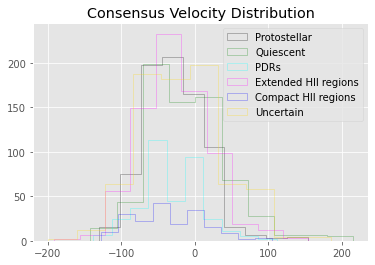

In [ ]:
plt.hist(class_a["Vc"], color = 'black', label = "Protostellar", alpha = 0.5, histtype=u'step')
plt.hist(class_q["Vc"], color = 'green', label = "Quiescent", alpha = 0.5, histtype=u'step')
plt.hist(class_p["Vc"], color = 'cyan', label = "PDRs", alpha = 0.5, histtype=u'step')
plt.hist(class_h["Vc"], color = 'magenta', label = "Extended HII regions", alpha = 0.5, histtype=u'step')
plt.hist(class_c["Vc"], color = 'blue', label = "Compact HII regions", alpha = 0.5, histtype=u'step')
plt.hist(class_u["Vc"], color = 'gold', label = "Uncertain", alpha = 0.5, histtype=u'step')

plt.title("Consensus Velocity Distribution")
plt.legend()

In [ ]:
!ls

 Aim_ml_split		    malt90fit_classes	       malt90image_Gim
 checkpoint		    malt90image		       malt90lineinfo.csv
 ckpt.data-00000-of-00001   malt90image_Aim	       malt90lineinfo.csv.1
 ckpt.index		    malt90imagearchive.tar    'MALT90 Training'
 MALT90_cleaning.ipynb	    malt90imagearchive.tar.1
 malt90fit_Aim_classes	    malt90image_fitresults


In [ ]:
!mkdir malt90fit_classes_Gim

In [ ]:
class_a_ids = class_a["ag_id"].values
class_p_ids = class_p["ag_id"].values
class_q_ids = class_q["ag_id"].values
class_h_ids = class_h["ag_id"].values
class_u_ids = class_u["ag_id"].values
class_c_ids = class_c["ag_id"].values


In [ ]:
import os

classes = [class_a_ids, class_p_ids, class_q_ids, class_h_ids, class_u_ids, class_c_ids]
class_destination = ["A", "P", "Q", "H", "U", "C"]

for class_dest in class_destination:
  os.makedirs(f"malt90fit_Gim_classes/{class_dest}", exist_ok = True)

In [ ]:
!ls

 Aim_ml_split		    malt90fit_classes	     malt90imagearchive.tar.1
 checkpoint		    malt90fit_classes_Gim    malt90image_fitresults
 ckpt.data-00000-of-00001   malt90fit_Gim_classes    malt90image_Gim
 ckpt.index		    malt90image		     malt90lineinfo.csv
 MALT90_cleaning.ipynb	    malt90image_Aim	     malt90lineinfo.csv.1
 malt90fit_Aim_classes	    malt90imagearchive.tar  'MALT90 Training'


In [ ]:
import os


for each_class in range(len(classes)):
  for id in classes[each_class]:
    os.replace(f"malt90image_Gim/{id}_Gim.png", f"malt90fit_Gim_classes/{class_destination[each_class]}/{id}_Gim.png")

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('malt90fit_Gim_classes', output="Gim_ml_split_Gim", seed=42, ratio=(0.8, 0.1,0.1)) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.78 files/s]
Copying files: 2 files [00:00,  4.28 files/s]
Copying files: 3 files [00:00,  3.53 files/s]
Copying files: 4 files [00:01,  2.80 files/s]
Copying files: 5 files [00:01,  3.03 files/s]
Copying files: 6 files [00:01,  3.19 files/s]
Copying files: 7 files [00:02,  3.40 files/s]
Copying files: 8 files [00:02,  3.53 files/s]
Copying files: 9 files [00:02,  3.88 files/s]
Copying files: 10 files [00:02,  3.95 files/s]
Copying files: 11 files [00:03,  4.02 files/s]
Copying files: 12 files [00:03,  3.89 files/s]
Copying files: 13 files [00:03,  3.61 files/s]
Copying files: 14 files [00:03,  3.30 files/s]
Copying files: 15 files [00:04,  3.51 files/s]
Copying files: 16 files [00:04,  3.53 files/s]
Copying files: 17 files [00:04,  3.80 files/s]
Copying files: 18 files [00:04,  3.99 files/s]
Copying files: 19 files [00:05,  3.62 files/s]
Copying files: 20 files [00:05,  3.73 files/s]
Copying files: 21 files [0